# **Solución ecuacion general**

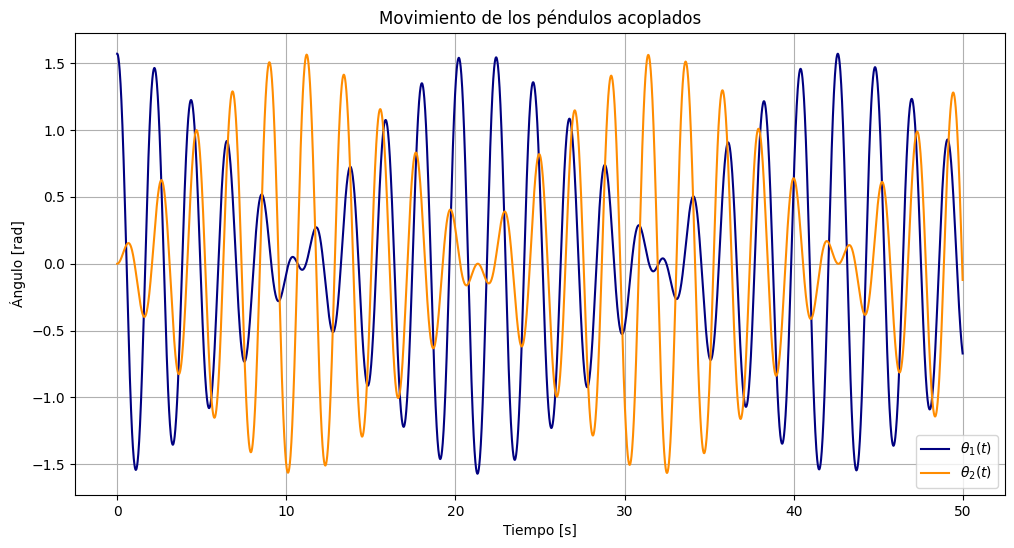

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las constantes del problema
g = 9.81    # aceleración debida a la gravedad en m/s^2
l_1 = 1.0   # longitud de la varilla 1 en metros
l_2 = 1.0   # longitud de la varilla 2 en metros
m_1 = 1.0  # masa del péndulo 1 en kg
m_2 = 1.0  # masa del péndulo 2 en kg
k = 1.0     # constante elástica del resorte en N/m

# Definimos la función que representa el sistema de ecuaciones
def f(t, y):
    theta1, omega1, theta2, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    # Fuerza de gravedad y fuerza elástica acoplada
    domega1_dt = -(g/l_1) * np.sin(theta1) - (k/m_1) * (theta1 - theta2)
    domega2_dt = -(g/l_2) * np.sin(theta2) + (k/m_2) * (theta1 - theta2)

    return np.array([dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt])

# Implementamos el método de Runge-Kutta de cuarto orden
def runge_kutta_4(f, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2)
        k4 = f(t[i], y[i-1] + dt*k3)

        y[i] = y[i-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

    return t, y

# Condiciones iniciales: theta1, omega1, theta2, omega2
y0 = np.array([np.pi/2, 0, 0, 0])  # El primer péndulo oscila, el segundo está en reposo

# Parámetros de tiempo
t0 = 0
tf = 50
dt = 0.01

# Integramos el sistema
t, y = runge_kutta_4(f, y0, t0, tf, dt)

# Graficamos los resultados
plt.figure(figsize=(12, 6))
plt.plot(t, y[:, 0], label=r'$\theta_1(t)$', color='navy')
plt.plot(t, y[:, 2], label=r'$\theta_2(t)$', color='darkorange')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)
plt.title('Movimiento de los péndulos acoplados')
plt.show()


# **Pequeñas oscilaciones**

Frecuencias naturales (rad/s): [3.28785644 3.13209195]
Vectores propios:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Frecuencias naturales (Hz): [0.52327861 0.49848792]


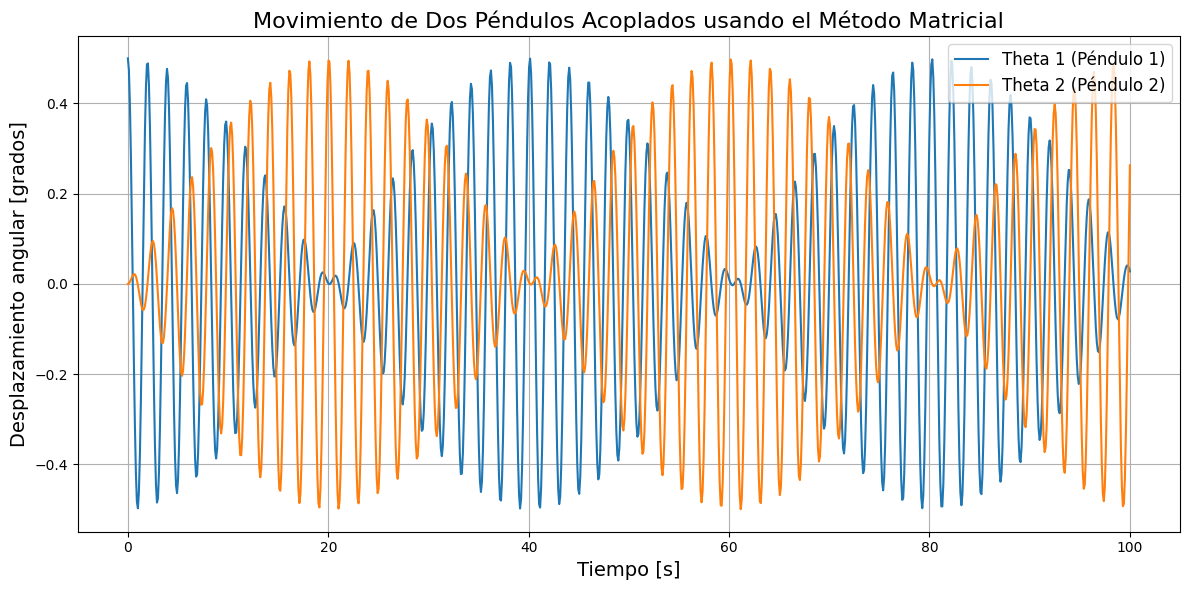

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
g = 9.81  # Aceleración gravitacional (m/s^2)

# Longitudes de los péndulos
L1 = 1.0  # Longitud del primer péndulo (m)
L2 = 1.0  # Longitud del segundo péndulo (m)

# Masas de los péndulos
m1 = 1.0  # Masa del primer péndulo (kg)
m2 = 1.0  # Masa del segundo péndulo (kg)

# Constante de acoplamiento
k = 0.5   # Constante del resorte (N/m)

# Matriz M (identidad 2x2)
M = np.eye(2)

# Matriz K (rigidez)
K = np.array([
    [g / L1 + (k / m1) * (L2 / L1), (-k / m1) * (L2 / L1)],
    [(-k / m2) * (L1 / L2), g / L2 + (k / m2) * (L1 / L2)]
])

# Calcular la matriz de sistema A = M^(-1) * K, donde M es la identidad, por lo que A = K
A = K

# Encontrar valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(A)

# Frecuencias naturales
omega_n = np.sqrt(eigenvalues)

# Mostrar frecuencias naturales y vectores propios
print("Frecuencias naturales (rad/s):", omega_n)
print("Vectores propios:\n", eigenvectors)

# Convertir a frecuencias naturales en Hz
frequencies = omega_n / (2 * np.pi)
print("Frecuencias naturales (Hz):", frequencies)

# Condiciones iniciales en grados
theta1_0 = 0.5  # Ángulo inicial del primer péndulo (grados)
theta2_0 = 0.0  # Ángulo inicial del segundo péndulo (grados)

# Convertir a radianes
theta0 = np.deg2rad([theta1_0, theta2_0])

# Expresar condiciones iniciales en términos de vectores propios
A_coefficients = np.linalg.inv(eigenvectors) @ theta0

# Tiempo de simulación
t = np.linspace(0, 100, 1000)

# Soluciones para cada modo normal
theta_t = (A_coefficients[0] * eigenvectors[:, 0] * np.exp(1j * omega_n[0] * t)[:, None] +
           A_coefficients[1] * eigenvectors[:, 1] * np.exp(1j * omega_n[1] * t)[:, None])

# Convertir a valores reales (parte real) y grados
theta_t_real = np.real(theta_t)
theta_t_deg = np.rad2deg(theta_t_real)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(t, theta_t_deg[:, 0], label='Theta 1 (Péndulo 1)')
plt.plot(t, theta_t_deg[:, 1], label='Theta 2 (Péndulo 2)')
plt.xlabel('Tiempo [s]', fontsize=14)
plt.ylabel('Desplazamiento angular [grados]', fontsize=14)
plt.title('Movimiento de Dos Péndulos Acoplados usando el Método Matricial', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## Punto 6

In [56]:
pip install numpy matplotlib scipy

###

```
# Tiene formato de código
```



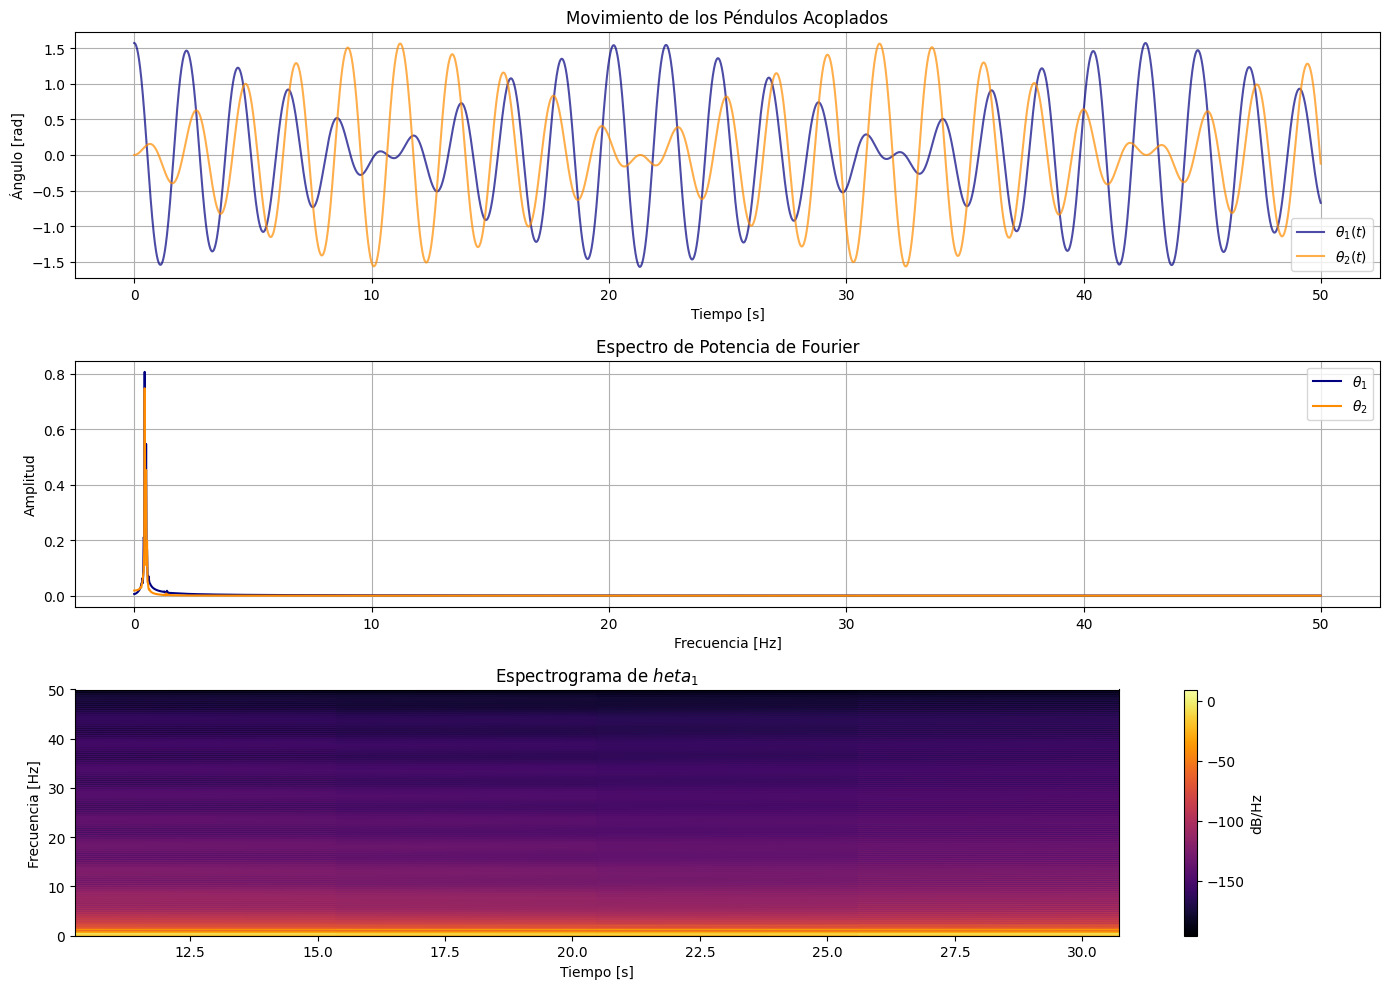

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram

# Definimos las constantes del problema
g = 9.81    # aceleración debida a la gravedad en m/s^2
l_1 = 1.0   # longitud de la varilla 1 en metros
l_2 = 1.0   # longitud de la varilla 2 en metros
m_1 = 1.0   # masa del péndulo 1 en kg
m_2 = 1.0   # masa del péndulo 2 en kg
k = 1.0     # constante elástica del resorte en N/m

# Definimos la función que representa el sistema de ecuaciones
def f(t, y):
    theta1, omega1, theta2, omega2 = y
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    domega1_dt = -(g/l_1) * np.sin(theta1) - (k/m_1) * (theta1 - theta2)
    domega2_dt = -(g/l_2) * np.sin(theta2) + (k/m_2) * (theta1 - theta2)
    return np.array([dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt])

# Implementamos el método de Runge-Kutta de cuarto orden
def runge_kutta_4(f, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2)
        k4 = f(t[i], y[i-1] + dt*k3)
        y[i] = y[i-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

# Condiciones iniciales
y0 = np.array([np.pi/2, 0, 0, 0])  # El primer péndulo oscila, el segundo está en reposo

# Parámetros de tiempo
t0 = 0
tf = 50
dt = 0.01

# Integramos el sistema
t, y = runge_kutta_4(f, y0, t0, tf, dt)

# Parámetros para el análisis de Fourier y espectrograma
N = len(t)
T = t[1] - t[0]
xf = fftfreq(N, T)

# FFT y espectro de potencia de Fourier
yf_theta1 = fft(y[:, 0])
yf_theta2 = fft(y[:, 2])
magnitude_theta1 = 2.0/N * np.abs(yf_theta1[:N//2])
magnitude_theta2 = 2.0/N * np.abs(yf_theta2[:N//2])

# Espectrograma
f_spec, t_spec, Sxx = spectrogram(y[:, 0], fs=1/T, nperseg=2048, noverlap=1024)

# Graficamos los resultados
plt.figure(figsize=(14, 10))

# Gráfico de los ángulos en el tiempo
plt.subplot(3, 1, 1)
plt.plot(t, y[:, 0], label=r'$\theta_1(t)$', color='navy', alpha=0.7)
plt.plot(t, y[:, 2], label=r'$\theta_2(t)$', color='darkorange', alpha=0.7)
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.legend()
plt.grid(True)
plt.title('Movimiento de los Péndulos Acoplados')

# Gráfico del espectro de potencia de Fourier
plt.subplot(3, 1, 2)
plt.plot(xf[:N//2], magnitude_theta1, label=r'$\theta_1$', color='navy')
plt.plot(xf[:N//2], magnitude_theta2, label=r'$\theta_2$', color='darkorange')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.title('Espectro de Potencia de Fourier')

# Gráfico del espectrograma
plt.subplot(3, 1, 3)
plt.pcolormesh(t_spec, f_spec, 10 * np.log10(Sxx), shading='gouraud', cmap='inferno')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de $\theta_1$')
plt.colorbar(label='dB/Hz')

plt.tight_layout()
plt.show()


### Grandes oscilaciones

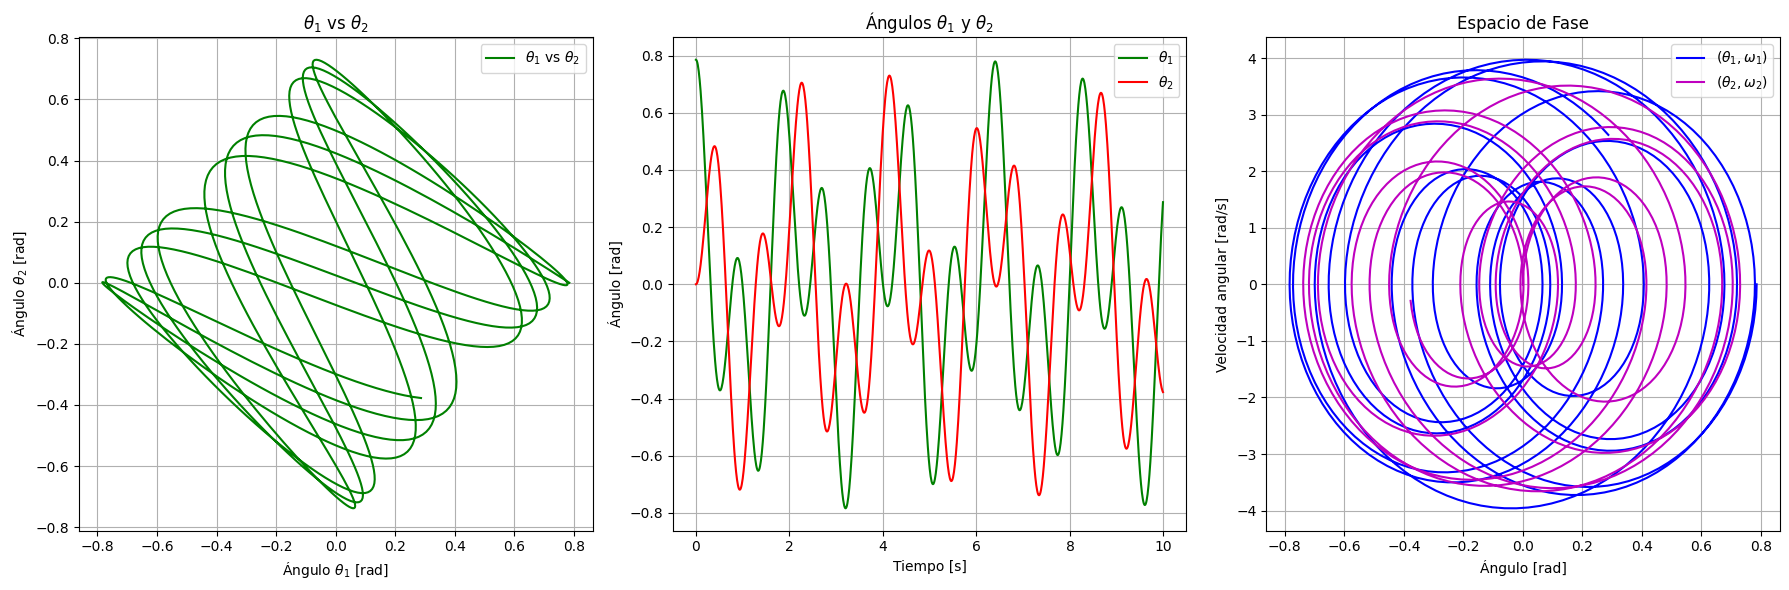

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las constantes del problema
g = 9.81    # aceleración debida a la gravedad en m/s^2
l_1 = 1.0   # longitud de la varilla 1 en metros
l_2 = 1.1   # longitud de la varilla 2 en metros
m_1 = 1.0   # masa del péndulo 1 en kg
m_2 = 1.1   # masa del  péndulo 2 en kg
k = 20.0   # constante elástica del resorte en N/m

# Definimos la función que representa el sistema de ecuaciones
def f(t, y):
    theta1, omega1, theta2, omega2 = y

    dtheta1_dt = omega1
    dtheta2_dt = omega2

    # Fuerza de gravedad y fuerza elástica acoplada
    domega1_dt = -(g/l_1) * np.sin(theta1) - (k/m_1) * (theta1 - theta2)
    domega2_dt = -(g/l_2) * np.sin(theta2) + (k/m_2) * (theta1 - theta2)

    return np.array([dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt])

# Implementamos el método de Runge-Kutta de cuarto orden
def runge_kutta_4(f, y0, t0, tf, dt):
    t = np.arange(t0, tf, dt)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0

    for i in range(1, len(t)):
        k1 = f(t[i-1], y[i-1])
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2)
        k4 = f(t[i], y[i-1] + dt*k3)

        y[i] = y[i-1] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

    return t, y

# Condiciones iniciales: theta1, omega1, theta2, omega2
y0 = np.array([np.pi/4, 0, 0, 0])

# Parámetros de tiempo
t0 = 0
tf = 10
dt = 0.01

# Integramos el sistema
t, y = runge_kutta_4(f, y0, t0, tf, dt)

# Graficamos los resultados
plt.figure(figsize=(18, 6))

# Gráfico de θ1 vs θ2
plt.subplot(1, 3, 1)
plt.plot(y[:, 0], y[:, 2], 'g', label=r'$\theta_1$ vs $\theta_2$')
plt.xlabel(r'Ángulo $\theta_1$ [rad]')
plt.ylabel(r'Ángulo $\theta_2$ [rad]')
plt.title(r'$\theta_1$ vs $\theta_2$')
plt.legend()
plt.grid(True)

# Gráfico de θ1 y θ2 en función del tiempo
plt.subplot(1, 3, 2)
plt.plot(t, y[:, 0], 'g', label=r'$\theta_1$')
plt.plot(t, y[:, 2], 'r', label=r'$\theta_2$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [rad]')
plt.title(r'Ángulos $\theta_1$ y $\theta_2$')
plt.legend()
plt.grid(True)

# Espacio de fase (θ1 vs ω1) y (θ2 vs ω2)
plt.subplot(1, 3, 3)
plt.plot(y[:, 0], y[:, 1], 'b', label=r'$(\theta_1, \omega_1)$')
plt.plot(y[:, 2], y[:, 3], 'm', label=r'$(\theta_2, \omega_2)$')
plt.xlabel('Ángulo [rad]')
plt.ylabel('Velocidad angular [rad/s]')
plt.title('Espacio de Fase')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### **Pequeñas oscilaciones**

In [ ]:
pip install ffmpeg-python
